<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-&amp;-helper-functions" data-toc-modified-id="Import-&amp;-helper-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import &amp; helper functions</a></span></li><li><span><a href="#Read-in-mappings" data-toc-modified-id="Read-in-mappings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in mappings</a></span></li><li><span><a href="#Table-1-examples" data-toc-modified-id="Table-1-examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Table 1 examples</a></span></li><li><span><a href="#Suppl-fig-summarizing-number-of-links-generated-by-mappings" data-toc-modified-id="Suppl-fig-summarizing-number-of-links-generated-by-mappings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Suppl fig summarizing number of links generated by mappings</a></span></li><li><span><a href="#Main-text-fig-1-and-corresponding-suppl-figs" data-toc-modified-id="Main-text-fig-1-and-corresponding-suppl-figs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Main text fig 1 and corresponding suppl figs</a></span><ul class="toc-item"><li><span><a href="#Number-of-links-per-evidence" data-toc-modified-id="Number-of-links-per-evidence-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of links per evidence</a></span></li><li><span><a href="#Recall-of-links-by-evidence" data-toc-modified-id="Recall-of-links-by-evidence-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Recall of links by evidence</a></span><ul class="toc-item"><li><span><a href="#Examples-where-manual-links-and-automated-links-were-different" data-toc-modified-id="Examples-where-manual-links-and-automated-links-were-different-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Examples where manual links and automated links were different</a></span></li></ul></li><li><span><a href="#Precision-of-links-by-evidence" data-toc-modified-id="Precision-of-links-by-evidence-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Precision of links by evidence</a></span><ul class="toc-item"><li><span><a href="#Examples-where-manual-links-did-not-support-automated-links" data-toc-modified-id="Examples-where-manual-links-did-not-support-automated-links-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Examples where manual links did not support automated links</a></span></li></ul></li></ul></li><li><span><a href="#Other-Suppl-Figs" data-toc-modified-id="Other-Suppl-Figs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Other Suppl Figs</a></span></li></ul></div>

## Import & helper functions

In [1]:
# Figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default') # set to your personal preference

# Change font workaround
import matplotlib.font_manager
font_dirs = ['/dors/capra_lab/users/evonne/resources/conda_envs/envs/hpo_mapping/fonts/']
font_files =  matplotlib.font_manager.findSystemFonts(fontpaths=font_dirs)
font_list =  matplotlib.font_manager.createFontList(font_files)
matplotlib.font_manager.fontManager.ttflist.extend(font_list)
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"


SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

#import seaborn as sns
#sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)

# Ipython notebook basics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.setrecursionlimit(5000)

# Things I use everytime
import numpy as np
np.random.seed(42)
import pandas as pd
import scipy.stats as stats


In [2]:
# My jupyter notebook needs a direct path to the brokenaxes folder
sys.path.insert(1, '/gpfs51/dors2/capra_lab/users/evonne/resources/conda_envs/envs/hpo_mapping/lib/python3.6/site-packages')  # the type of path is string 
from brokenaxes import brokenaxes

In [3]:
def colorsAndText(phecode_str):
    colors = {f'stringMatch_hpo-{phecode_str}':['#e15759','#e15759'],
    f'subStringMatch_hpo-to-{phecode_str}':['#e9787a','#e9787a'],
    f'subStringMatch_{phecode_str}-to-hpo':['#e9787a','#e9787a'],
    f'stringMatch_hpo-ICD9':['#e15759','#e15759'],
    f'subStringMatch_hpo-to-ICD9':['#e9787a','#e9787a'],
    f'subStringMatch_ICD9-to-hpo':['#e9787a','#e9787a'],
    f'stringMatch_hpo-ICD10':['#e15759','#e15759'],
    f'subStringMatch_hpo-to-ICD10':['#e9787a','#e9787a'],
    f'subStringMatch_ICD10-to-hpo':['#e9787a','#e9787a'],
    f'SORTA_{phecode_str}-to-hpo':['#efab3a','#f6cf8d'],
    f'SORTA_ICD9-to-hpo':['#efab3a','#f6cf8d'],
    f'SORTA_ICD10-to-hpo':['#efab3a','#f6cf8d'],
    f'PheMap_{phecode_str}-hpo':['#b07aa2','#cca9c3'],
    f'sharedUMLSCUIplusRel_ICD9-hpo':['#76b7b2','#9fd1cd'],
    f'sharedUMLSCUIplusRel_ICD10-hpo':['#76b7b2','#9fd1cd'],
    f'wikiMedMap_hpo-to-ICD9':['#4e79a7','#4e79a7'],
    f'wikiMedMap_hpo-to-ICD10':['#4e79a7','#4e79a7'],
    f'':['#ffffff','#ffffff'],
     "StrongEvidenceSpecific":["#484b58","#484b58"],
     "StrongEvidenceBroad":["#848894","#848894"],
     "AnyEvidence":["#d2d3d8","#d2d3d8"]}

    text = {f'stringMatch_hpo-{phecode_str}':'HPO ↔ Phecode : String',
    f'subStringMatch_hpo-to-{phecode_str}':'HPO → Phecode : Sub-string',
    f'subStringMatch_{phecode_str}-to-hpo':'Phecode → HPO : Sub-string',
    f'stringMatch_hpo-ICD9':'HPO ↔ ICD9 : String',
    f'subStringMatch_hpo-to-ICD9':'HPO → ICD9 : Sub-string',
    f'subStringMatch_ICD9-to-hpo':'ICD9 → HPO : Sub-string',
    f'stringMatch_hpo-ICD10':'HPO ↔ ICD10 : String',
    f'subStringMatch_hpo-to-ICD10':'HPO → ICD10 : Sub-string',
    f'subStringMatch_ICD10-to-hpo':'ICD10 → HPO : Sub-string',
    f'SORTA_{phecode_str}-to-hpo':'Phecode → HPO : SORTA',
    f'SORTA_ICD9-to-hpo':'ICD9 → HPO : SORTA',
    f'SORTA_ICD10-to-hpo':'ICD10 → HPO : SORTA',
    f'PheMap_{phecode_str}-hpo':'HPO ↔ Phecode : PheMap',
    f'sharedUMLSCUIplusRel_ICD9-hpo':'HPO ↔ ICD9 : UMLS CUI',
    f'sharedUMLSCUIplusRel_ICD10-hpo':'HPO ↔ ICD10 : UMLS CUI',
    f'wikiMedMap_hpo-to-ICD9':'HPO → ICD9 : WikiMedMap',
    f'wikiMedMap_hpo-to-ICD10':'HPO → ICD10 : WikiMedMap',
      "StrongEvidenceSpecific": "Strong evidence - Specific",
      "StrongEvidenceBroad":"Strong evidence - Broad",
      "AnyEvidence":"Any evidence",
      "":""}

    return colors,text

## Read in mappings

In [4]:
allLinks_phecode12 = pd.read_csv("../data/finalHPO-phecodeLinks/hpo-phecode1.2_links_withEvidenceRatings.tsv",sep="\t",dtype={'phecode1.2_code':str})
allLinks_phecode12.head()
allLinks_phecodeX = pd.read_csv("../data/finalHPO-phecodeLinks/hpo-phecodeX_links_withEvidenceRatings.tsv",sep="\t",dtype={'phecodeX_code':str})
allLinks_phecodeX.head()

allLinks_children_phecode12 = pd.read_csv("../data/finalHPO-phecodeLinks/hpo-phecode1.2_links_withHPOchildrenExpansion.tsv",sep="\t",dtype={'phecode1.2_code':str})
allLinks_children_phecode12.head()
allLinks_children_phecodeX = pd.read_csv("../data/finalHPO-phecodeLinks/hpo-phecodeX_links_withHPOchildrenExpansion.tsv",sep="\t",dtype={'phecodeX_code':str})
allLinks_children_phecodeX.head()


evidence_phecode12 = [
    'stringMatch_hpo-phecode1.2',
    'subStringMatch_hpo-to-phecode1.2',
    'subStringMatch_phecode1.2-to-hpo',
    'stringMatch_hpo-ICD9',
    'subStringMatch_hpo-to-ICD9',
    'subStringMatch_ICD9-to-hpo',
    'stringMatch_hpo-ICD10',
    'subStringMatch_hpo-to-ICD10',
    'subStringMatch_ICD10-to-hpo',
    'SORTA_phecode1.2-to-hpo',
    'SORTA_ICD9-to-hpo',
    'SORTA_ICD10-to-hpo',
    'PheMap_phecode1.2-hpo',
    'sharedUMLSCUIplusRel_ICD9-hpo',
    'sharedUMLSCUIplusRel_ICD10-hpo',
    'wikiMedMap_hpo-to-ICD9',
    'wikiMedMap_hpo-to-ICD10',
]

evidence_phecodeX = [
    'stringMatch_hpo-phecodeX',
    'subStringMatch_hpo-to-phecodeX',
    'subStringMatch_phecodeX-to-hpo',
    'stringMatch_hpo-ICD9',
    'subStringMatch_hpo-to-ICD9',
    'subStringMatch_ICD9-to-hpo',
    'stringMatch_hpo-ICD10',
    'subStringMatch_hpo-to-ICD10',
    'subStringMatch_ICD10-to-hpo',
    'SORTA_phecodeX-to-hpo',
    'SORTA_ICD9-to-hpo',
    'SORTA_ICD10-to-hpo',
    'sharedUMLSCUIplusRel_ICD9-hpo',
    'sharedUMLSCUIplusRel_ICD10-hpo',
    'wikiMedMap_hpo-to-ICD9',
    'wikiMedMap_hpo-to-ICD10',
]

,phecode1.2_code,phecode1.2_label,phecode1.2_category,hpo_code,hpo_label,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,subStringMatch_hpo-to-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
0,008,Intestinal infection,infectious diseases,HP_0033143,Jejunitis,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True
1,008,Intestinal infection,infectious diseases,HP_0004387,Enterocolitis,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
2,008,Intestinal infection,infectious diseases,HP_0011024,Abnormality of the gastrointestinal tract,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True
3,008,Intestinal infection,infectious diseases,HP_0200042,Skin ulcer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,008,Intestinal infection,infectious diseases,HP_0100523,Liver abscess,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


,phecodeX_code,phecodeX_label,phecodeX_category,hpo_code,hpo_label,stringMatch_hpo-phecodeX,subStringMatch_hpo-to-phecodeX,subStringMatch_phecodeX-to-hpo,stringMatch_hpo-ICD9,subStringMatch_hpo-to-ICD9,...,SORTA_ICD10-to-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
0,001,Salmonella,ID,HP_0033143,Jejunitis,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
1,001,Salmonella,ID,HP_0005661,Salmonella osteomyelitis,NaN,NaN,NaN,True,True,...,100.00,True,True,True,True,NaN,NaN,NaN,True,True
2,002,Staphylococcus,ID,HP_0000951,Abnormality of the skin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True
3,002,Staphylococcus,ID,HP_0032326,Methicillin-resistant Staphylococcus aureus in...,NaN,NaN,NaN,NaN,NaN,...,93.88,NaN,NaN,True,True,NaN,NaN,NaN,True,True
4,002,Staphylococcus,ID,HP_0100658,Cellulitis,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True


,phecode1.2_code,phecode1.2_label,phecode1.2_category,hpo_code,hpo_label,hpo_child,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
0,008,Intestinal infection,infectious diseases,HP_0001026,Penetrating foot ulcers,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,008,Intestinal infection,infectious diseases,HP_0002014,Diarrhea,False,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,True
2,008,Intestinal infection,infectious diseases,HP_0002028,Chronic diarrhea,True,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,True
3,008,Intestinal infection,infectious diseases,HP_0002041,Intractable diarrhea,True,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,True
4,008,Intestinal infection,infectious diseases,HP_0002249,Melena,True,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,True,True,NaN,NaN,True


,phecodeX_code,phecodeX_label,phecodeX_category,hpo_code,hpo_label,hpo_child,stringMatch_hpo-phecodeX,subStringMatch_hpo-to-phecodeX,subStringMatch_phecodeX-to-hpo,stringMatch_hpo-ICD9,...,SORTA_ICD10-to-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
0,001,Salmonella,ID,HP_0005661,Salmonella osteomyelitis,False,NaN,NaN,NaN,True,...,100.0,True,True,True,True,NaN,NaN,NaN,True,True
1,001,Salmonella,ID,HP_0033143,Jejunitis,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
2,089,Infections,ID,HP_0005661,Salmonella osteomyelitis,False,NaN,NaN,NaN,True,...,100.0,True,True,True,True,NaN,NaN,NaN,True,True
3,089,Infections,ID,HP_0033143,Jejunitis,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True
4,089,Infections,ID,HP_0000951,Abnormality of the skin,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True


## Table 1 examples

In [12]:
allLinks_phecode12[(allLinks_phecode12['phecode1.2_code'] == '038') & (allLinks_phecode12['hpo_code'] == "HP_0100806")].loc[:,['phecode1.2_label','hpo_label']+evidence_phecode12].T
allLinks_phecode12[(allLinks_phecode12['phecode1.2_code'] == '010') & (allLinks_phecode12['hpo_code'] == "HP_0032262")].loc[:,['phecode1.2_label','hpo_label']+evidence_phecode12].T
allLinks_phecode12[(allLinks_phecode12['phecode1.2_code'] == '070') & (allLinks_phecode12['hpo_code'] == "HP_0006562")].loc[:,['phecode1.2_label','hpo_label']+evidence_phecode12].T
allLinks_phecode12[(allLinks_phecode12['phecode1.2_code'] == '230') & (allLinks_phecode12['hpo_code'] == "HP_0002664")].loc[:,['phecode1.2_label','hpo_label']+evidence_phecode12].T
allLinks_phecode12[(allLinks_phecode12['phecode1.2_code'] == '284.1') & (allLinks_phecode12['hpo_code'] == "HP_0001915")].loc[:,['phecode1.2_label','hpo_label']+evidence_phecode12].T
allLinks_phecode12[(allLinks_phecode12['phecode1.2_code'] == '345.1') & (allLinks_phecode12['hpo_code'] == "HP_0002069")].loc[:,['phecode1.2_label','hpo_label']+evidence_phecode12].T


,31
phecode1.2_label,Septicemia
hpo_label,Sepsis
stringMatch_hpo-phecode1.2,NaN
subStringMatch_hpo-to-phecode1.2,NaN
subStringMatch_phecode1.2-to-hpo,NaN
stringMatch_hpo-ICD9,NaN
subStringMatch_hpo-to-ICD9,NaN
subStringMatch_ICD9-to-hpo,NaN
stringMatch_hpo-ICD10,NaN
subStringMatch_hpo-to-ICD10,NaN


,29
phecode1.2_label,Tuberculosis
hpo_label,Pulmonary tuberculosis
stringMatch_hpo-phecode1.2,NaN
subStringMatch_hpo-to-phecode1.2,NaN
subStringMatch_phecode1.2-to-hpo,NaN
stringMatch_hpo-ICD9,True
subStringMatch_hpo-to-ICD9,True
subStringMatch_ICD9-to-hpo,True
stringMatch_hpo-ICD10,NaN
subStringMatch_hpo-to-ICD10,NaN


,67
phecode1.2_label,Viral hepatitis
hpo_label,Viral hepatitis
stringMatch_hpo-phecode1.2,True
subStringMatch_hpo-to-phecode1.2,True
subStringMatch_phecode1.2-to-hpo,True
stringMatch_hpo-ICD9,True
subStringMatch_hpo-to-ICD9,True
subStringMatch_ICD9-to-hpo,True
stringMatch_hpo-ICD10,True
subStringMatch_hpo-to-ICD10,True


,1250
phecode1.2_label,Kaposi's sarcoma
hpo_label,Neoplasm
stringMatch_hpo-phecode1.2,NaN
subStringMatch_hpo-to-phecode1.2,NaN
subStringMatch_phecode1.2-to-hpo,NaN
stringMatch_hpo-ICD9,NaN
subStringMatch_hpo-to-ICD9,NaN
subStringMatch_ICD9-to-hpo,NaN
stringMatch_hpo-ICD10,NaN
subStringMatch_hpo-to-ICD10,NaN


,2270
phecode1.2_label,Pancytopenia
hpo_label,Aplastic anemia
stringMatch_hpo-phecode1.2,NaN
subStringMatch_hpo-to-phecode1.2,NaN
subStringMatch_phecode1.2-to-hpo,NaN
stringMatch_hpo-ICD9,NaN
subStringMatch_hpo-to-ICD9,NaN
subStringMatch_ICD9-to-hpo,NaN
stringMatch_hpo-ICD10,NaN
subStringMatch_hpo-to-ICD10,NaN


,3271
phecode1.2_label,Epilepsy
hpo_label,Bilateral tonic-clonic seizure
stringMatch_hpo-phecode1.2,NaN
subStringMatch_hpo-to-phecode1.2,NaN
subStringMatch_phecode1.2-to-hpo,NaN
stringMatch_hpo-ICD9,NaN
subStringMatch_hpo-to-ICD9,NaN
subStringMatch_ICD9-to-hpo,NaN
stringMatch_hpo-ICD10,NaN
subStringMatch_hpo-to-ICD10,NaN


## Suppl fig summarizing number of links generated by mappings

In [131]:
def plotSummary(evidence, links, phecode_str,axes):
    
    print("Number of links:")
    print(len(links))
    
    print("Min and max links per evidence:")
    print(min(links[evidence].count()))
    print(max(links[evidence].count()))
    
    ax = axes[0]
#     fig,ax=plt.subplots(figsize=(4,3))
    counts = links.groupby(f'{phecode_str}_code')['hpo_code'].count()
    counts.hist(ax=ax,bins=np.arange(0,max(counts)+1,1))
    _ = ax.set_xlabel("Number of HPO terms\nlinked to a given phecode")
    numUnique = len(links[f'{phecode_str}_code'].unique())
    numAvg = links.groupby([f'{phecode_str}_code'])['hpo_code'].count().mean()
    ax.text(0.2, 0.5,f'Number of phecodes\nwith at least 1 HPO\nterm linked: {numUnique}\n\nAverage number of\nHPO terms linked to each\nphecode: {numAvg:.2f}',
     transform = ax.transAxes)
    ax.grid(False)

    ax = axes[1]
#     fig,ax=plt.subplots(figsize=(4,3))
    counts = links.groupby('hpo_code')[f'{phecode_str}_code'].count()
    counts.hist(ax=ax,bins=np.arange(0,max(counts)+1,1))
    _ = ax.set_xlabel("Number of Phecodes codes\nlinked to a given HPO code")
    numUnique = len(links[f'hpo_code'].unique())
    numAvg = links.groupby(['hpo_code'])[f'{phecode_str}_code'].count().mean()
    ax.text(0.2, 0.5,f'Number of HPO codes\nwith at least 1 phecode\nlinked: {numUnique}\n\nAverage number of\nphecodes linked to each\nHPO term: {numAvg:.2f}',
     transform = ax.transAxes)
    ax.grid(False)
    
    ax = axes[2]
   # fig,ax=plt.subplots(figsize=(4,3))
    links[evidence].count(axis=1).hist(bins=np.arange(0,len(evidence)+1,1),ax=ax)
    ax.set_xlim(0,len(evidence))
    propWithOneLink = sum(links[evidence].count(axis=1) == 1)/len(links)
    numAvg = links[evidence].count(axis=1).mean()
    ax.text(0.25, 0.5,f'Percent of phecode-HPO\nlinks with only 1 piece\nof evidence: {propWithOneLink*100:.1f}%\n\nAverage evidence count\nfor each phecode-HPO\nlink: {numAvg:.2f}',
     transform = ax.transAxes)
    _ = ax.set_xlabel("Count of evidence\nper Phecode-HPO link")
    ax.grid(False)


Number of links:
10524
Min and max links per evidence:
315
5458

phecodeX
Number of links:
12731
Min and max links per evidence:
791
7020

phecode1.2 + children
Number of links:
38812
Min and max links per evidence:
1566
20382

phecodeX + children
Number of links:
45074
Min and max links per evidence:
3482
25743


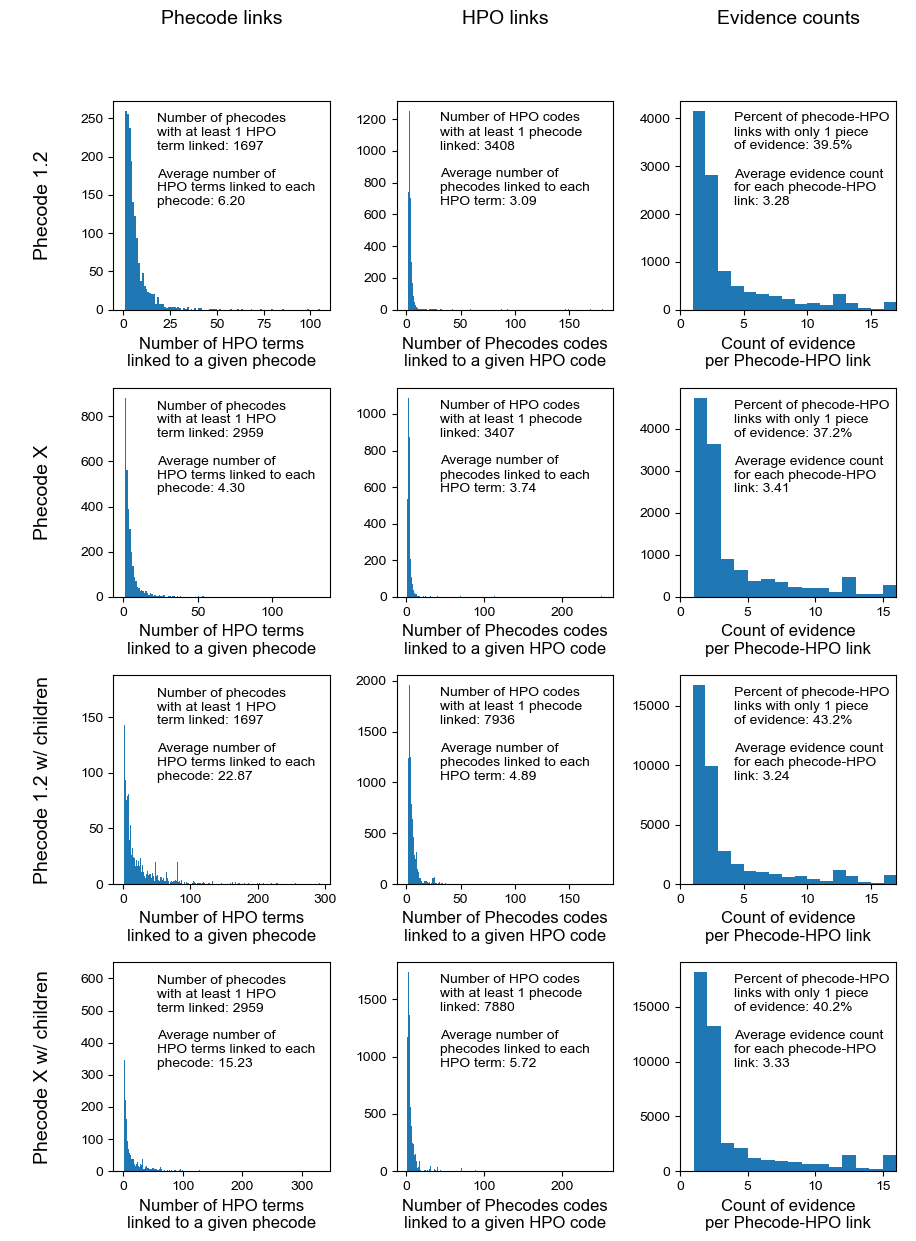

In [136]:
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(3.1*3,3*4+.5),gridspec_kw={'width_ratios': [0.1, 3, 3, 3],'height_ratios':[0.1,3,3,3,3]})

ax[0, 0].set_axis_off()
ax[0, 1].set_axis_off(); _ = ax[0, 1].text(0.5, 0.5, 'Phecode links', ha='center',va='center',fontsize=14);
ax[0, 2].set_axis_off(); _ = ax[0, 2].text(0.5, 0.5, 'HPO links',ha='center',va='center',fontsize=14);
ax[0, 3].set_axis_off(); _ = ax[0, 3].text(0.5, 0.5, 'Evidence counts',ha='center',va='center',fontsize=14);

ax[1, 0].set_axis_off(); _ = ax[1, 0].text(0.5, 0.5, 'Phecode 1.2', ha='center',va='center',fontsize=14,rotation=90);
ax[2, 0].set_axis_off(); _ = ax[2, 0].text(0.5, 0.5, 'Phecode X', ha='center',va='center',fontsize=14,rotation=90);
ax[3, 0].set_axis_off(); _ = ax[3, 0].text(0.5, 0.5, 'Phecode 1.2 w/ children', ha='center',va='center',fontsize=14,rotation=90);
ax[4, 0].set_axis_off(); _ = ax[4, 0].text(0.5, 0.5, 'Phecode X w/ children', ha='center',va='center',fontsize=14,rotation=90);


# ax[1, 0].set_axis_off(); ax[1,0].text(0.5, 0.5, 'Neanderthal\n(intersection)',ha='center',va='center',fontsize=7, rotation=90);
# print("phecode1.2")
plotSummary(evidence_phecode12,allLinks_phecode12,'phecode1.2',(ax[1,1],ax[1,2],ax[1,3]))
print("\nphecodeX")
plotSummary(evidence_phecodeX,allLinks_phecodeX,'phecodeX',(ax[2,1],ax[2,2],ax[2,3]))
print("\nphecode1.2 + children")
plotSummary(evidence_phecode12,allLinks_children_phecode12,'phecode1.2',(ax[3,1],ax[3,2],ax[3,3]))
print("\nphecodeX + children")
plotSummary(evidence_phecodeX,allLinks_children_phecodeX,'phecodeX',(ax[4,1],ax[4,2],ax[4,3]))
plt.tight_layout()

## Main text fig 1 and corresponding suppl figs

In [24]:
def splitBarPlot(allLinks, allLinks_strict, evidenceToPlot, colors, text, xlabel=None, xlim=None, bax_lims=None,size_inc=0):
    width = 0.35
    
    if bax_lims is not None:
        fig = plt.figure(figsize=(4+size_inc,5+size_inc))
        axis = brokenaxes(xlims=bax_lims)
    else:
        fig, axis = plt.subplots(figsize=(4+size_inc,5+size_inc))

    a = axis.barh(np.arange(len(evidenceToPlot)) + width, allLinks[evidenceToPlot[::-1]], width,color = [colors[x][0] for x in evidenceToPlot[::-1]]) # plot a vals
    b = axis.barh(np.arange(len(evidenceToPlot)) , allLinks_strict[evidenceToPlot[::-1]], width,color = [colors[x][1] for x in evidenceToPlot[::-1]])  # plot b vals
    
    if bax_lims is not None:
        for ax in axis.axs:
            ax.set_yticks(np.arange(len(evidenceToPlot))[[x != "" for x in evidenceToPlot[::-1]]] + width/2)  # position axis ticks
            ax.set_yticklabels([text[x] for x in evidenceToPlot[::-1] if x != ""])  # set them to the names
        
        if xlabel is not None:
            axis.axs[0].set_xlabel(xlabel)
            
        for i, v in enumerate(evidenceToPlot[::-1]):
            if allLinks[v] != 0:
                if allLinks[v] != allLinks_strict[v]:
                    num_label = f'  {allLinks[v]} ({allLinks_strict[v]})'
                else:
                    num_label = f'  {allLinks[v]}'
                if allLinks[v] < bax_lims[0][1]-2000:
                    axis.axs[0].text(allLinks[v], i, num_label, color='#848894',fontsize=8)
                elif allLinks[v] < bax_lims[0][1]:
                    axis.axs[1].text( bax_lims[1][0]-3300, i, num_label, color='#848894',fontsize=8)
                else:
                    axis.axs[1].text(allLinks[v], i, num_label, color='#848894',fontsize=8)
        _ = axis.axs[0].set_ylim(-.5,len(evidenceToPlot))
        _ = axis.axs[1].set_ylim(-.5,len(evidenceToPlot))

        
    else:

        axis.set_yticks(np.arange(len(evidenceToPlot))[[x != "" for x in evidenceToPlot[::-1]]] + width/2)  # position axis ticks
        axis.set_yticklabels([text[x] for x in evidenceToPlot[::-1] if x != ""])  # set them to the names
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)
    
        if xlabel is not None:
            _ = axis.set_xlabel(xlabel)
        _ = axis.set_ylim(-.5,len(evidenceToPlot))
        _ = axis.set_xlim(0,xlim)

    plt.show()

### Number of links per evidence

In [278]:
def plotNumLinks(allLinks_in,phecode_str,evidenceToPlot,xlim=None,bax_lims=None,size_inc=0):
    allLinks = allLinks_in.copy(deep=True)
    allLinks_strict = allLinks.copy(deep=True)
    allLinks[''] = np.nan
    allLinks_strict[''] = np.nan
    evidence_sorta = [f'SORTA_{phecode_str}-to-hpo', 'SORTA_ICD9-to-hpo', 'SORTA_ICD10-to-hpo']
    if phecode_str == "phecode1.2":
        evidence_phemap = ['PheMap_phecode1.2-hpo']
        allLinks_strict[evidence_phemap] = (allLinks_strict[evidence_phemap] >= 43.21934845055406).applymap(lambda x: True if x else np.nan)
    allLinks_strict[evidence_sorta] = (allLinks_strict[evidence_sorta]== 100).applymap(lambda x: True if x else np.nan)
    allLinks_strict['sharedUMLSCUIplusRel_ICD9-hpo'] = allLinks_strict['sharedUMLSCUI_ICD9-hpo']
    allLinks_strict['sharedUMLSCUIplusRel_ICD10-hpo'] = allLinks_strict['sharedUMLSCUI_ICD10-hpo']

    colors, text = colorsAndText(phecode_str)
    splitBarPlot(allLinks.count(), allLinks_strict.count(), evidenceToPlot, colors, text, xlabel='                   Number of HPO-Phecode links', xlim=xlim, bax_lims=bax_lims,size_inc=size_inc)


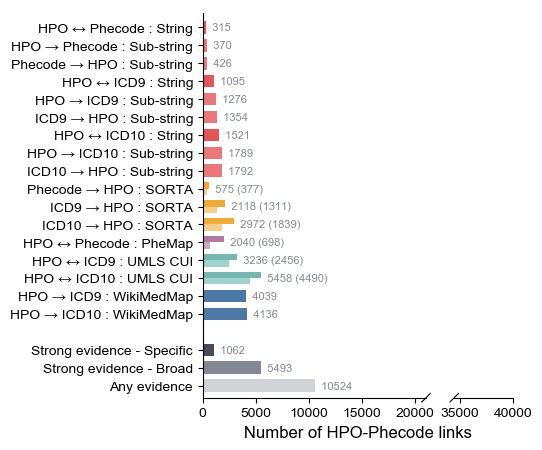

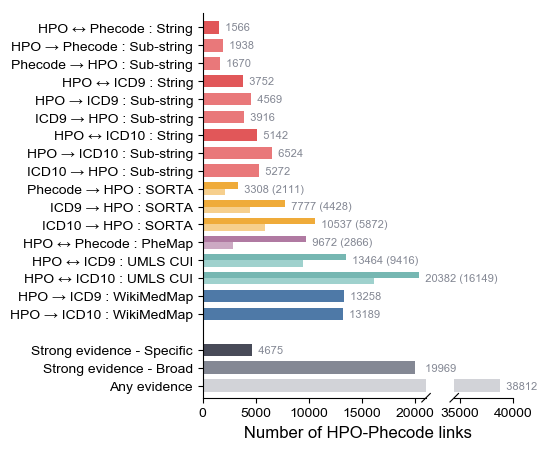

In [279]:
evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotNumLinks(allLinks_phecode12,'phecode1.2',evidenceToPlot,bax_lims=((0, 21000), (34500, 40000)))

evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotNumLinks(allLinks_children_phecode12,'phecode1.2',evidenceToPlot,bax_lims=((0, 21000), (34500, 40000)))

#https://github.com/bendichter/brokenaxes

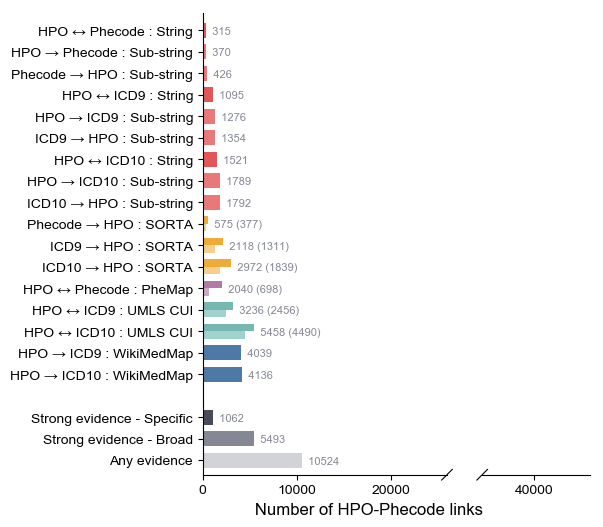

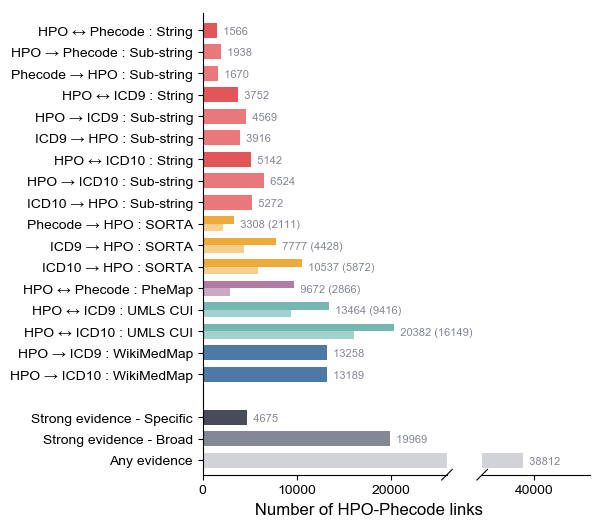

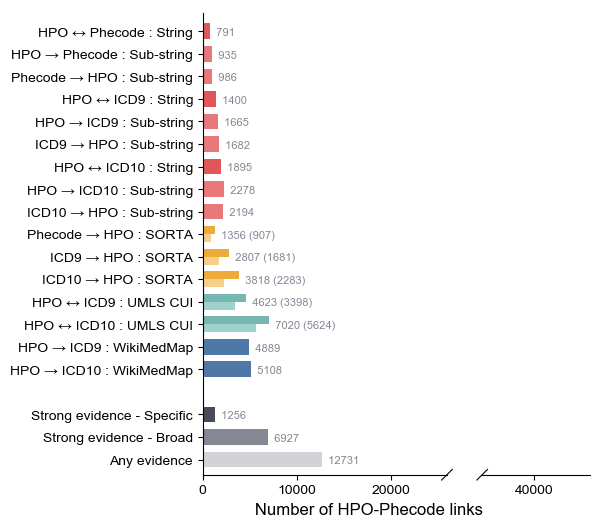

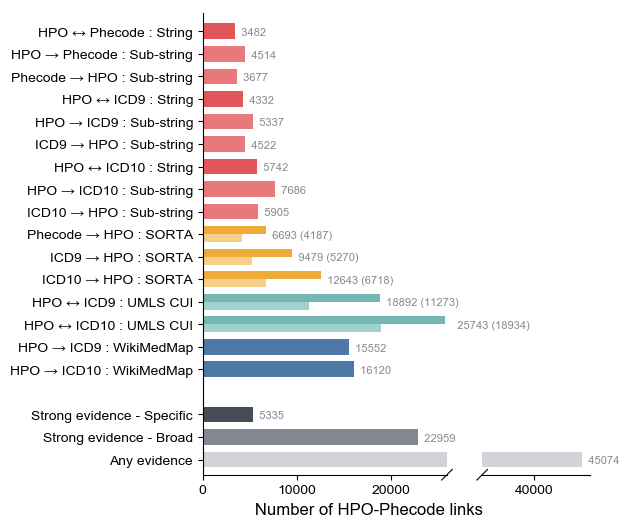

In [216]:
evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotNumLinks(allLinks_phecode12,'phecode1.2',evidenceToPlot,bax_lims=((0, 26000), (34500, 46000)),size_inc=1)

evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotNumLinks(allLinks_children_phecode12,'phecode1.2',evidenceToPlot,bax_lims=((0, 26000), (34500, 46000)),size_inc=1)

evidenceToPlot = evidence_phecodeX + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotNumLinks(allLinks_phecodeX,'phecodeX',evidenceToPlot,bax_lims=((0, 26000), (34500, 46000)),size_inc=1)

evidenceToPlot = evidence_phecodeX + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotNumLinks(allLinks_children_phecodeX,'phecodeX',evidenceToPlot,bax_lims=((0, 26000), (34500, 46000)),size_inc=1)


### Recall of links by evidence

In [25]:
def plotRecall(manualLinks,allLinks_in,phecode_str,evidenceToPlot,xlim=None,bax_lims=None,size_inc=0):
    allLinks = allLinks_in.copy(deep=True)
    allLinks_strict = allLinks.copy(deep=True)
    allLinks[''] = np.nan
    allLinks_strict[''] = np.nan
    evidence_sorta = [f'SORTA_{phecode_str}-to-hpo', 'SORTA_ICD9-to-hpo', 'SORTA_ICD10-to-hpo']
    if phecode_str == "phecode1.2":
        evidence_phemap = ['PheMap_phecode1.2-hpo']
        allLinks_strict[evidence_phemap] = (allLinks_strict[evidence_phemap] >= 43.21934845055406).applymap(lambda x: True if x else np.nan)
    allLinks_strict[evidence_sorta] = (allLinks_strict[evidence_sorta]== 100).applymap(lambda x: True if x else np.nan)
    allLinks_strict['sharedUMLSCUIplusRel_ICD9-hpo'] = allLinks_strict['sharedUMLSCUI_ICD9-hpo']
    allLinks_strict['sharedUMLSCUIplusRel_ICD10-hpo'] = allLinks_strict['sharedUMLSCUI_ICD10-hpo']
    
    recall = manualLinks.merge(allLinks)[evidenceToPlot].count()/len(manualLinks)
    recall_strict = manualLinks.merge(allLinks_strict)[evidenceToPlot].count()/len(manualLinks)
    
    colors, text = colorsAndText(phecode_str)
    splitBarPlot(recall, recall_strict, evidenceToPlot, colors, text, xlabel='Recall', xlim=xlim, bax_lims=bax_lims,size_inc=size_inc)


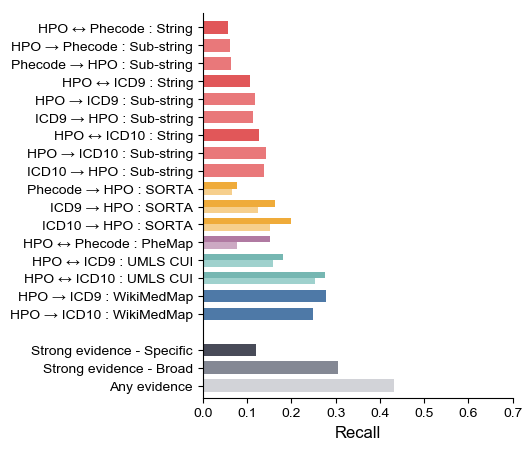

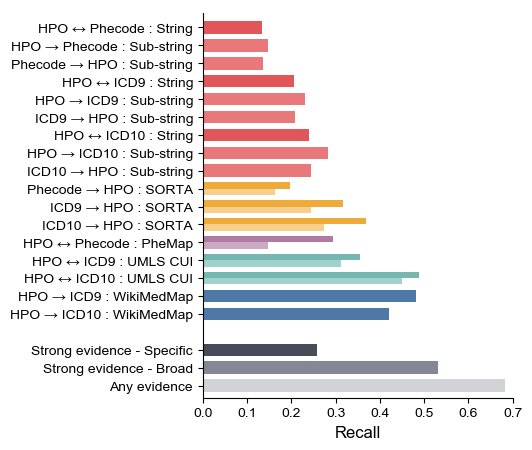

In [26]:
manualLinks_phecode12 = pd.read_csv(f"../data/manualReview/hpo-phecode1.2-links_manuallyLinked.tsv",sep="\t",dtype=str)
manualLinks_phecodeX = pd.read_csv(f"../data/manualReview/hpo-phecodeX-links_manuallyLinked.tsv",sep="\t",dtype=str).head(4200)

evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotRecall(manualLinks_phecode12, allLinks_phecode12,'phecode1.2',evidenceToPlot,xlim=0.7)

evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotRecall(manualLinks_phecode12, allLinks_children_phecode12,'phecode1.2',evidenceToPlot,xlim=0.7)


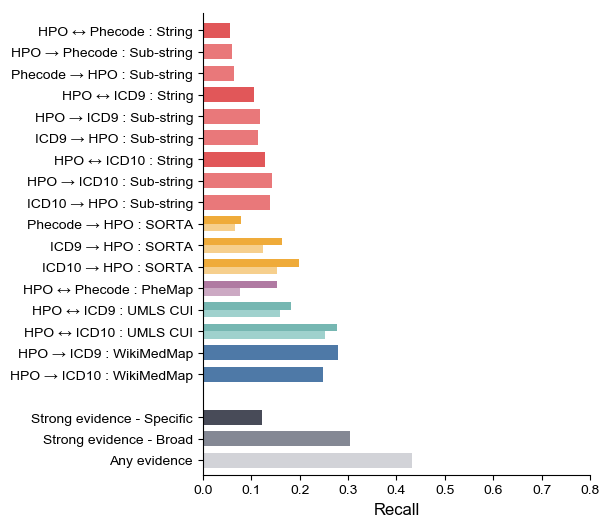

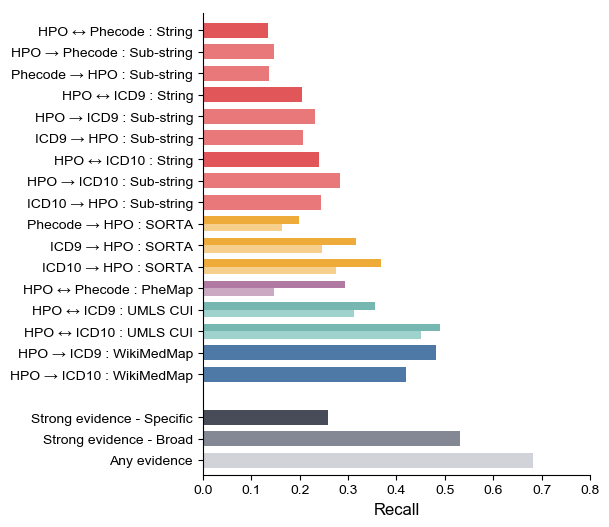

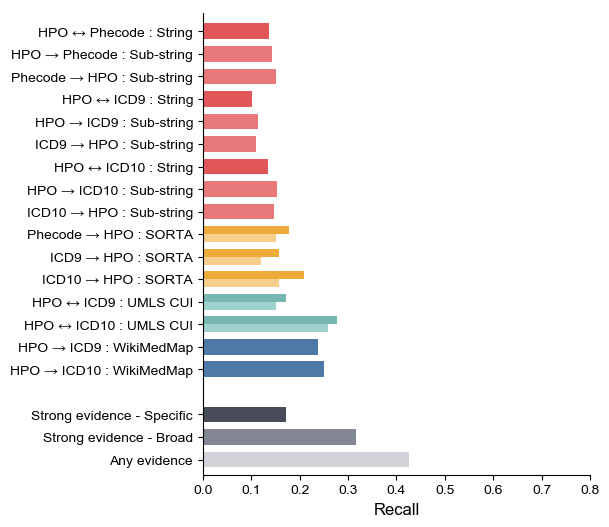

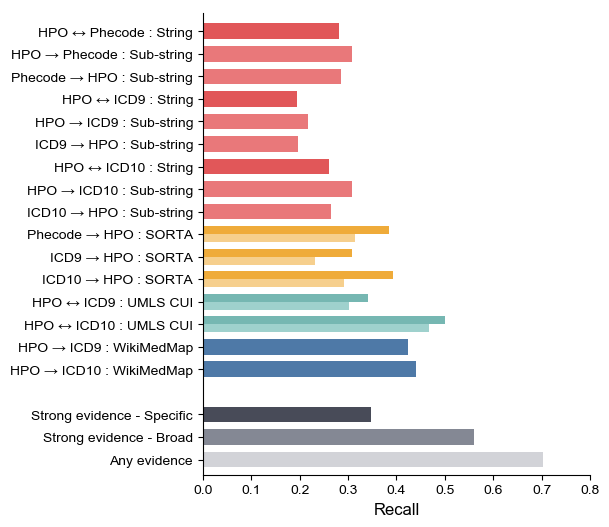

In [27]:

evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotRecall(manualLinks_phecode12, allLinks_phecode12,'phecode1.2',evidenceToPlot,xlim=0.8,size_inc=1)

evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotRecall(manualLinks_phecode12, allLinks_children_phecode12,'phecode1.2',evidenceToPlot,xlim=0.8,size_inc=1)

evidenceToPlot = evidence_phecodeX + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotRecall(manualLinks_phecodeX, allLinks_phecodeX,'phecodeX',evidenceToPlot,xlim=0.8,size_inc=1)

evidenceToPlot = evidence_phecodeX + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
plotRecall(manualLinks_phecodeX, allLinks_children_phecodeX,'phecodeX',evidenceToPlot,xlim=0.8,size_inc=1)

#### Examples where manual links and automated links were different

In [306]:
## Examples
# Hypotonia
allLinks_children_phecode12[allLinks_children_phecode12['hpo_code'] == 'HP_0001290']
allLinks_children_phecodeX[allLinks_children_phecodeX['hpo_code'] == 'HP_0001290']
allLinks_children_phecode12[allLinks_children_phecode12['hpo_code'] == 'HP_0001156']
allLinks_children_phecode12[allLinks_children_phecode12['hpo_code'] == 'HP_0031291']
allLinks_children_phecode12[allLinks_children_phecode12['hpo_code'] == 'HP_0007000']




hpo = pd.read_csv(f"../data/hpo.tsv",sep="\t",dtype=str)[['hpo_code','hpo_label','hpo_original']]
hpo = hpo[hpo['hpo_original']=='True'].reset_index().drop(['index','hpo_original'],axis=1)
phecode12 = pd.read_csv(f"../data/phecode1.2.tsv",sep="\t",dtype=str)[['phecode1.2_code','phecode1.2_label','phecode1.2_category']]

manual_links = pd.read_csv(f"../data/manualReview/hpo-phecode1.2-links_manuallyLinked.tsv",sep="\t",dtype=str)
allLinks_children_phecode12 = pd.read_csv("../data/finalHPO-phecodeLinks/hpo-phecode1.2_links_withHPOchildrenExpansion.tsv",sep="\t",dtype={'phecode1.2_code':str})
comp = manual_links.merge(allLinks_children_phecode12,how='left')
comp['id'] = comp['phecode1.2_category'].notnull()
comp = comp[['hpo_code','phecode1.2_code','id']]
comp = comp.merge(hpo,how='left').merge(phecode12,how='left')
comp.head()
len(comp[comp['id'] == False]['hpo_code'].unique())
otherOptions = comp[comp['id'] == False].merge(allLinks_children_phecode12,on='hpo_code',how='left')
len(otherOptions[otherOptions['phecode1.2_code_y'].notnull()]['hpo_code'].unique()) # have other things linked
otherOptions[otherOptions['phecode1.2_code_y'].isnull()].head(20) # no other things linked

,phecode1.2_code,phecode1.2_label,phecode1.2_category,hpo_code,hpo_label,hpo_child,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
911,656,Other perinatal conditions of fetus or newborn,pregnancy complications,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
7966,350,Abnormal movement,neurological,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
10363,358,Myoneural disorders,neurological,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
33544,350.3,Lack of coordination,neurological,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True


,phecodeX_code,phecodeX_label,phecodeX_category,hpo_code,hpo_label,hpo_child,stringMatch_hpo-phecodeX,subStringMatch_hpo-to-phecodeX,subStringMatch_phecodeX-to-hpo,stringMatch_hpo-ICD9,...,SORTA_ICD10-to-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
9321,338,Myasthenia gravis and other myoneural disorders,Neuro,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
9440,872,Other and ill-defined conditions originating i...,Neonate,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
9490,872.1,Disorders of muscle tone of newborn*,Neonate,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
33854,325,Symptoms and signs related to movement disorders,Neuro,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
34726,325.3,Lack of coordination,Neuro,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
35883,872.12,Congenital hypotonia*,Neonate,HP_0001290,Generalized hypotonia,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True


,phecode1.2_code,phecode1.2_label,phecode1.2_category,hpo_code,hpo_label,hpo_child,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
6436,756,Other congenital musculoskeletal anomalies,congenital anomalies,HP_0001156,Brachydactyly,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
35524,755,Congenital anomalies of limbs,congenital anomalies,HP_0001156,Brachydactyly,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
38621,755.4,"Congenital anomalies of upper limb, including ...",congenital anomalies,HP_0001156,Brachydactyly,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True


,phecode1.2_code,phecode1.2_label,phecode1.2_category,hpo_code,hpo_label,hpo_child,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
8892,691,Congenital anomalies of skin,dermatologic,HP_0031291,Ichthyosis follicularis,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True
9157,701,Other hypertrophic and atrophic conditions of ...,dermatologic,HP_0031291,Ichthyosis follicularis,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True
18780,450,Noninfectious disorders of lymphatic channels,circulatory system,HP_0031291,Ichthyosis follicularis,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
38104,691.1,Ichthyosis congenita,dermatologic,HP_0031291,Ichthyosis follicularis,True,NaN,NaN,NaN,NaN,...,15.696806,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True


,phecode1.2_code,phecode1.2_label,phecode1.2_category,hpo_code,hpo_label,hpo_child,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
7775,333,Extrapyramidal disease and abnormal movement d...,neurological,HP_0007000,Morning myoclonic jerks,True,NaN,NaN,NaN,True,...,NaN,True,True,True,True,True,True,NaN,True,True
7868,350,Abnormal movement,neurological,HP_0007000,Morning myoclonic jerks,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
8110,350.1,Abnormal involuntary movements,neurological,HP_0007000,Morning myoclonic jerks,True,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
33746,333.4,Torsion dystonia,neurological,HP_0007000,Morning myoclonic jerks,True,NaN,NaN,NaN,NaN,...,13.973787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
35166,333.2,Myoclonus,neurological,HP_0007000,Morning myoclonic jerks,True,True,True,True,True,...,63.748263,True,True,True,True,True,True,True,True,True


In [305]:
otherOptions['evidence'] = otherOptions[otherOptions['phecode1.2_code_y'].notnull()][evidence_phecode12].count(axis=1)
otherOptions.sort_values('evidence',ascending=False)

,hpo_code,phecode1.2_code_x,id,hpo_label_x,phecode1.2_label_x,phecode1.2_category_x,phecode1.2_code_y,phecode1.2_label_y,phecode1.2_category_y,hpo_label_y,...,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence,evidence
1398,HP_0011003,360.2,False,High myopia,Progressive myopia,sense organs,367.1,Myopia,sense organs,High myopia,...,True,True,True,True,True,True,True,True,True,17.0
1997,HP_0001905,656.5,False,Congenital thrombocytopenia,Hematological disorders of newborn,pregnancy complications,287.3,Thrombocytopenia,hematopoietic,Congenital thrombocytopenia,...,True,True,True,True,True,True,True,True,True,17.0
1959,HP_0007812,369.2,False,Herpetiform corneal ulceration,"Eye infection, viral",sense organs,370.1,Corneal ulcer,sense organs,Herpetiform corneal ulceration,...,True,True,True,True,True,True,True,True,True,17.0
1766,HP_0007000,345,False,Morning myoclonic jerks,"Epilepsy, recurrent seizures, convulsions",neurological,333.2,Myoclonus,neurological,Morning myoclonic jerks,...,True,True,True,True,True,True,True,True,True,17.0
1063,HP_0001949,255.12,False,Hypokalemic alkalosis,Hyperaldosteronism,endocrine/metabolic,276.42,Alkalosis,endocrine/metabolic,Hypokalemic alkalosis,...,True,True,True,True,True,True,True,True,True,17.0
1597,HP_0004918,588,False,Hyperchloremic metabolic acidosis,Disorders resulting from impaired renal function,genitourinary,276.41,Acidosis,endocrine/metabolic,Hyperchloremic metabolic acidosis,...,True,True,True,True,True,True,True,True,True,17.0
884,HP_0009732,215,False,Plexiform neurofibroma,Other benign neoplasm of connective and other ...,neoplasms,199.4,Neurofibromatosis,neoplasms,Plexiform neurofibroma,...,True,True,True,True,True,True,True,True,True,16.0
502,HP_0002151,573.6,False,Increased serum lactate,Nonspecific elevation of levels of transaminas...,digestive,276.41,Acidosis,endocrine/metabolic,Increased serum lactate,...,True,True,True,True,True,True,True,True,True,16.0
635,HP_0012040,364.2,False,Corneal stromal edema,Corneal edema,sense organs,782.3,Edema,symptoms,Corneal stromal edema,...,True,True,True,True,True,True,True,True,True,16.0
1924,HP_0005208,557,False,Secretory diarrhea,Intestinal malabsorption (non-celiac),digestive,561.1,Diarrhea,digestive,Secretory diarrhea,...,True,True,True,True,True,NaN,True,True,True,16.0


In [384]:
# For Bootstrapping DF

# denom = len(manual_links)

# manual_links_bootstrap = pd.DataFrame([])
# manual_links_bootstrap_strict = pd.DataFrame([])

# for i in range(5):
#     manual_links_bootstrap = pd.concat([manual_links_bootstrap,
#                                         manual_links.sample(n=len(manual_links), replace=True).merge(allLinks)[evidenceToPlot].count()/denom],
#                                         axis=1)
#     manual_links_bootstrap_strict = pd.concat([manual_links_bootstrap_strict,
#                                         manual_links.sample(n=len(manual_links), replace=True).merge(allLinks_strict)[evidenceToPlot].count()/denom],
#                                         axis=1)
    
# ci = [stats.norm.interval(.99,loc=m,scale=s/np.sqrt(5)) for m,s in zip(manual_links_bootstrap.mean(axis=1)[evidenceToPlot],manual_links_bootstrap.std(axis=1)[evidenceToPlot])]
# ci_strict = [stats.norm.interval(.95,loc=m,scale=s/np.sqrt(5)) for m,s in zip(manual_links_bootstrap_strict.mean(axis=1)[evidenceToPlot],manual_links_bootstrap_strict.std(axis=1)[evidenceToPlot])]

# ci = [[c[0]-r,c[1]-r] for r,c in zip(recall,ci)]
# ci_strict = [[c[0]-r,c[1]-r] for r,c in zip(recall_strict,ci_strict)]

# for i in range(len(evidenceToPlot)):
#     _ = ax.errorbar(recall[::-1][i],i,xerr=[ci[::-1][i]], color='k')

### Precision of links by evidence

In [13]:
def splitStackedBarPlot(allLinks, allLinks_strict, evidenceToPlot, colors, text, xlabel=None, xlim=None, size_inc=0):
    width = 0.35
    
    fig, axis = plt.subplots(figsize=(4+size_inc,5+size_inc))

    bottom = [0 for x in evidenceToPlot]
    bottomStrict = [0 for x in evidenceToPlot]
    for cat,hatch in zip(['perfectMatch','hpoNarrower','phecodeNarrower'],['','.....',"OO"]):
        a = axis.barh(np.arange(len(evidenceToPlot)) + width, allLinks.loc[cat,evidenceToPlot[::-1]], width, left=bottom, hatch=hatch,color = [colors[x][0] for x in evidenceToPlot[::-1]],alpha=.99) # plot a vals
        b = axis.barh(np.arange(len(evidenceToPlot)) , allLinks_strict.loc[cat,evidenceToPlot[::-1]], width, left=bottomStrict, hatch=hatch,color = [colors[x][1] for x in evidenceToPlot[::-1]],alpha=.99)  # plot b vals
        bottom += allLinks.loc[cat,evidenceToPlot[::-1]]
        bottomStrict += allLinks_strict.loc[cat,evidenceToPlot[::-1]]


    axis.set_yticks(np.arange(len(evidenceToPlot))[[x != "" for x in evidenceToPlot[::-1]]] + width/2)  # position axis ticks
    axis.set_yticklabels([text[x] for x in evidenceToPlot[::-1] if x != ""])  # set them to the names
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)

    if xlabel is not None:
        _ = axis.set_xlabel(xlabel)
    _ = axis.set_xlim(0,xlim)
    _ = axis.set_ylim(-.5,len(evidenceToPlot))

    plt.show()

In [14]:
def plotPrecision(manualReview,allLinks_in,phecode_str,evidenceToPlot,xlim=None,size_inc=0):
    allLinks = allLinks_in.copy(deep=True)
    allLinks_strict = allLinks.copy(deep=True)
    allLinks[''] = np.nan
    allLinks_strict[''] = np.nan
    evidence_sorta = [f'SORTA_{phecode_str}-to-hpo', 'SORTA_ICD9-to-hpo', 'SORTA_ICD10-to-hpo']
    if phecode_str == "phecode1.2":
        evidence_phemap = ['PheMap_phecode1.2-hpo']
        allLinks_strict[evidence_phemap] = (allLinks_strict[evidence_phemap] >= 43.21934845055406).applymap(lambda x: True if x else np.nan)
    allLinks_strict[evidence_sorta] = (allLinks_strict[evidence_sorta]== 100).applymap(lambda x: True if x else np.nan)
    allLinks_strict['sharedUMLSCUIplusRel_ICD9-hpo'] = allLinks_strict['sharedUMLSCUI_ICD9-hpo']
    allLinks_strict['sharedUMLSCUIplusRel_ICD10-hpo'] = allLinks_strict['sharedUMLSCUI_ICD10-hpo']
 
    precision = manualReview.merge(allLinks)
    precision = pd.DataFrame([{**{'evidence':x},**calculatePrecisionByCategory(precision[precision[x].notnull()]['narrower'])} for x in evidenceToPlot]).T
    precision.columns = precision.loc['evidence']
    precision = precision.drop('evidence',axis=0)
    
    precision_strict = manualReview.merge(allLinks_strict)
    precision_strict = pd.DataFrame([{**{'evidence':x},**calculatePrecisionByCategory(precision_strict[precision_strict[x].notnull()]['narrower'])} for x in evidenceToPlot]).T
    precision_strict.columns = precision_strict.loc['evidence']
    precision_strict = precision_strict.drop('evidence',axis=0)
    
    colors, text = colorsAndText(phecode_str)
    splitStackedBarPlot(precision, precision_strict, evidenceToPlot, colors, text, xlabel='Precision', xlim=xlim,size_inc=size_inc)
    
    return precision

In [15]:
def calculatePrecisionByCategory(manual_list):
    if len(manual_list) == 0:
        return {'perfectMatch':0,'hpoNarrower':0,'phecodeNarrower':0}

    perfectMatch = sum(manual_list == "M")/len(manual_list)
    hpoNarrower = sum(manual_list == "H")/len(manual_list)
    phecodeNarrower = sum(manual_list == "P")/len(manual_list)

    return {'perfectMatch':perfectMatch,'hpoNarrower':hpoNarrower,'phecodeNarrower':phecodeNarrower}


250

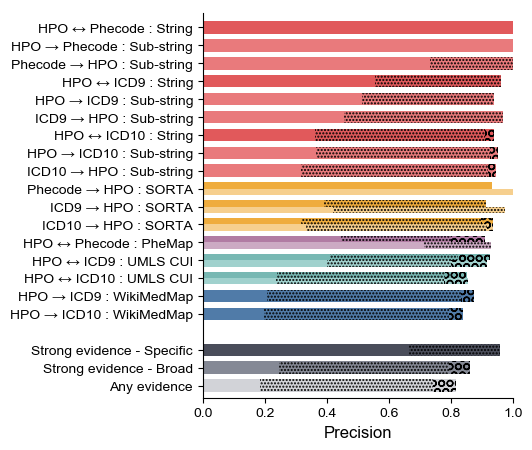

stringMatch_hpo-phecode1.2           10
subStringMatch_hpo-to-phecode1.2     10
subStringMatch_phecode1.2-to-hpo     15
stringMatch_hpo-ICD9                 27
subStringMatch_hpo-to-ICD9           33
subStringMatch_ICD9-to-hpo           33
stringMatch_hpo-ICD10                33
subStringMatch_hpo-to-ICD10          41
subStringMatch_ICD10-to-hpo          38
SORTA_phecode1.2-to-hpo              15
SORTA_ICD9-to-hpo                    59
SORTA_ICD10-to-hpo                   79
PheMap_phecode1.2-hpo                45
sharedUMLSCUIplusRel_ICD9-hpo        68
sharedUMLSCUIplusRel_ICD10-hpo      129
wikiMedMap_hpo-to-ICD9               96
wikiMedMap_hpo-to-ICD10             107
dtype: int64

250

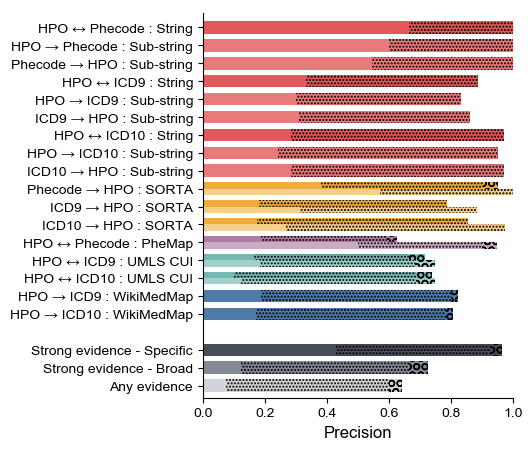

stringMatch_hpo-phecode1.2            9
subStringMatch_hpo-to-phecode1.2     10
subStringMatch_phecode1.2-to-hpo     11
stringMatch_hpo-ICD9                 27
subStringMatch_hpo-to-ICD9           30
subStringMatch_ICD9-to-hpo           29
stringMatch_hpo-ICD10                35
subStringMatch_hpo-to-ICD10          41
subStringMatch_ICD10-to-hpo          35
SORTA_phecode1.2-to-hpo              21
SORTA_ICD9-to-hpo                    61
SORTA_ICD10-to-hpo                   69
PheMap_phecode1.2-hpo                59
sharedUMLSCUIplusRel_ICD9-hpo        78
sharedUMLSCUIplusRel_ICD10-hpo      138
wikiMedMap_hpo-to-ICD9               91
wikiMedMap_hpo-to-ICD10              93
dtype: int64

In [16]:
manualReview_phecode12 = pd.read_csv(f"../data/manualReview/hpo-phecode1.2-links_manuallyReviewed.csv",dtype=str)
manualReview_phecode12 = manualReview_phecode12[manualReview_phecode12['narrower'].notnull()]
len(manualReview_phecode12)
evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
precision = plotPrecision(manualReview_phecode12, allLinks_phecode12,'phecode1.2',evidenceToPlot)
manualReview_phecode12.merge(allLinks_phecode12)[evidence_phecode12].count()

manualReview_children_phecode12 = pd.read_csv(f"../data/manualReview/hpo-phecode1.2-links_withHPOchildrenExpansion_manuallyReviewed.csv",dtype=str)
manualReview_children_phecode12 = manualReview_children_phecode12[manualReview_children_phecode12['narrower'].notnull()]
len(manualReview_children_phecode12)
evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
precision_children = plotPrecision(manualReview_children_phecode12, allLinks_children_phecode12,'phecode1.2',evidenceToPlot)
manualReview_children_phecode12.merge(allLinks_children_phecode12)[evidence_phecode12].count()

In [41]:
precision = precision.T
precision['sum'] = precision.sum(axis=1)
precision['fraction_hpo_narrower'] = [n/d if d !=0 else np.nan for n,d in zip(precision['hpoNarrower'].values,precision['sum'].values)]
precision['fraction_phecode_narrower'] = [n/d if d !=0 else np.nan for n,d in zip(precision['phecodeNarrower'].values,precision['sum'].values)]
precision

precision_children = precision_children.T
precision_children['sum'] = precision_children.sum(axis=1)
precision_children['fraction_hpo_narrower'] = [n/d if d !=0 else np.nan for n,d in zip(precision_children['hpoNarrower'].values,precision_children['sum'].values)]
precision_children['fraction_phecode_narrower'] = [n/d if d !=0 else np.nan for n,d in zip(precision_children['phecodeNarrower'].values,precision_children['sum'].values)]
precision_children

,hpoNarrower,perfectMatch,phecodeNarrower,sum,fraction_hpo_narrower,fraction_phecode_narrower
evidence,,,,,,
stringMatch_hpo-phecode1.2,0,1,0,1.000000,0.000000,0.000000
subStringMatch_hpo-to-phecode1.2,0,1,0,1.000000,0.000000,0.000000
subStringMatch_phecode1.2-to-hpo,0.266667,0.733333,0,1.000000,0.266667,0.000000
stringMatch_hpo-ICD9,0.407407,0.555556,0,0.962963,0.423077,0.000000
subStringMatch_hpo-to-ICD9,0.424242,0.515152,0,0.939394,0.451613,0.000000
subStringMatch_ICD9-to-hpo,0.515152,0.454545,0,0.969697,0.531250,0.000000
stringMatch_hpo-ICD10,0.545455,0.363636,0.030303,0.939394,0.580645,0.032258
subStringMatch_hpo-to-ICD10,0.560976,0.365854,0.0243902,0.951220,0.589744,0.025641
subStringMatch_ICD10-to-hpo,0.605263,0.315789,0.0263158,0.947368,0.638889,0.027778


,hpoNarrower,perfectMatch,phecodeNarrower,sum,fraction_hpo_narrower,fraction_phecode_narrower
evidence,,,,,,
stringMatch_hpo-phecode1.2,0.333333,0.666667,0,1.000000,0.333333,0.000000
subStringMatch_hpo-to-phecode1.2,0.4,0.6,0,1.000000,0.400000,0.000000
subStringMatch_phecode1.2-to-hpo,0.454545,0.545455,0,1.000000,0.454545,0.000000
stringMatch_hpo-ICD9,0.555556,0.333333,0,0.888889,0.625000,0.000000
subStringMatch_hpo-to-ICD9,0.533333,0.3,0,0.833333,0.640000,0.000000
subStringMatch_ICD9-to-hpo,0.551724,0.310345,0,0.862069,0.640000,0.000000
stringMatch_hpo-ICD10,0.685714,0.285714,0,0.971429,0.705882,0.000000
subStringMatch_hpo-to-ICD10,0.707317,0.243902,0,0.951220,0.743590,0.000000
subStringMatch_ICD10-to-hpo,0.685714,0.285714,0,0.971429,0.705882,0.000000


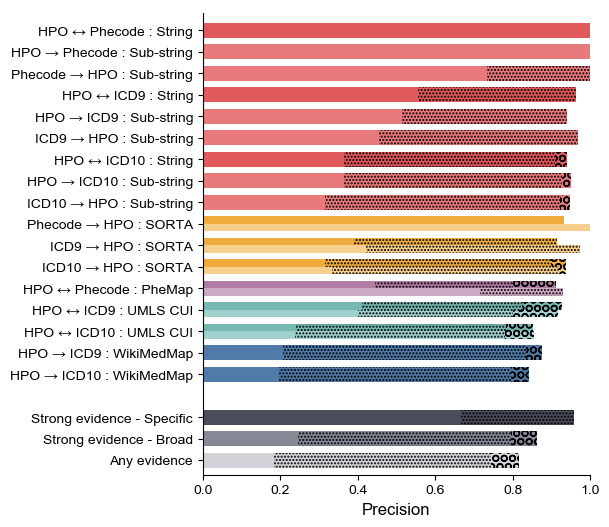

evidence
stringMatch_hpo-phecode1.2          1.000000
subStringMatch_hpo-to-phecode1.2    1.000000
subStringMatch_phecode1.2-to-hpo    1.000000
stringMatch_hpo-ICD9                0.962963
subStringMatch_hpo-to-ICD9          0.939394
subStringMatch_ICD9-to-hpo          0.969697
stringMatch_hpo-ICD10               0.939394
subStringMatch_hpo-to-ICD10         0.951220
subStringMatch_ICD10-to-hpo         0.947368
SORTA_phecode1.2-to-hpo             0.933333
SORTA_ICD9-to-hpo                   0.915254
SORTA_ICD10-to-hpo                  0.936709
PheMap_phecode1.2-hpo               0.911111
sharedUMLSCUIplusRel_ICD9-hpo       0.926471
sharedUMLSCUIplusRel_ICD10-hpo      0.852713
wikiMedMap_hpo-to-ICD9              0.875000
wikiMedMap_hpo-to-ICD10             0.841121
                                    0.000000
StrongEvidenceSpecific              0.958333
StrongEvidenceBroad                 0.863014
AnyEvidence                         0.816000
dtype: float64

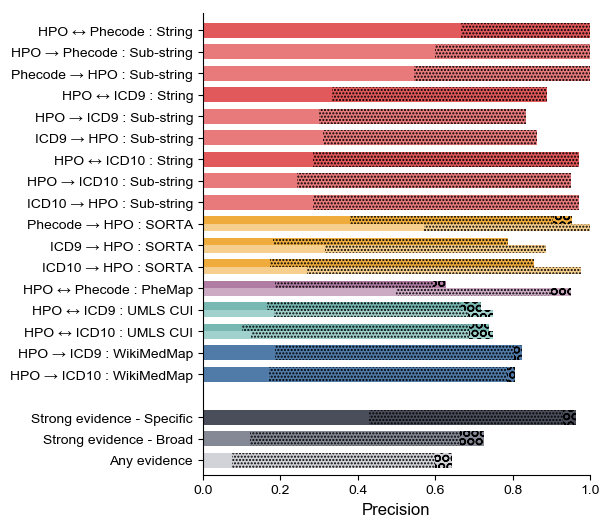

evidence
stringMatch_hpo-phecode1.2          1.000000
subStringMatch_hpo-to-phecode1.2    1.000000
subStringMatch_phecode1.2-to-hpo    1.000000
stringMatch_hpo-ICD9                0.888889
subStringMatch_hpo-to-ICD9          0.833333
subStringMatch_ICD9-to-hpo          0.862069
stringMatch_hpo-ICD10               0.971429
subStringMatch_hpo-to-ICD10         0.951220
subStringMatch_ICD10-to-hpo         0.971429
SORTA_phecode1.2-to-hpo             0.952381
SORTA_ICD9-to-hpo                   0.786885
SORTA_ICD10-to-hpo                  0.855072
PheMap_phecode1.2-hpo               0.627119
sharedUMLSCUIplusRel_ICD9-hpo       0.717949
sharedUMLSCUIplusRel_ICD10-hpo      0.739130
wikiMedMap_hpo-to-ICD9              0.824176
wikiMedMap_hpo-to-ICD10             0.806452
                                    0.000000
StrongEvidenceSpecific              0.964286
StrongEvidenceBroad                 0.725191
AnyEvidence                         0.644000
dtype: float64

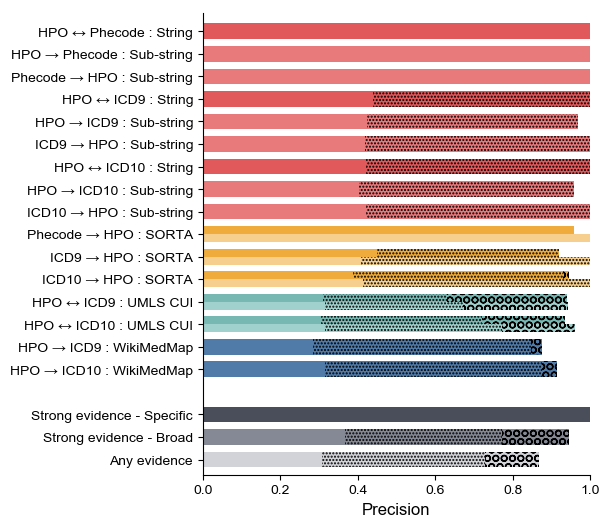

evidence
stringMatch_hpo-phecodeX          1.000000
subStringMatch_hpo-to-phecodeX    1.000000
subStringMatch_phecodeX-to-hpo    1.000000
stringMatch_hpo-ICD9              1.000000
subStringMatch_hpo-to-ICD9        0.969697
subStringMatch_ICD9-to-hpo        1.000000
stringMatch_hpo-ICD10             1.000000
subStringMatch_hpo-to-ICD10       0.957447
subStringMatch_ICD10-to-hpo       1.000000
SORTA_phecodeX-to-hpo             0.958333
SORTA_ICD9-to-hpo                 0.918367
SORTA_ICD10-to-hpo                0.944444
sharedUMLSCUIplusRel_ICD9-hpo     0.940476
sharedUMLSCUIplusRel_ICD10-hpo    0.936000
wikiMedMap_hpo-to-ICD9            0.875000
wikiMedMap_hpo-to-ICD10           0.914286
                                  0.000000
StrongEvidenceSpecific            1.000000
StrongEvidenceBroad               0.945312
AnyEvidence                       0.868000
dtype: float64

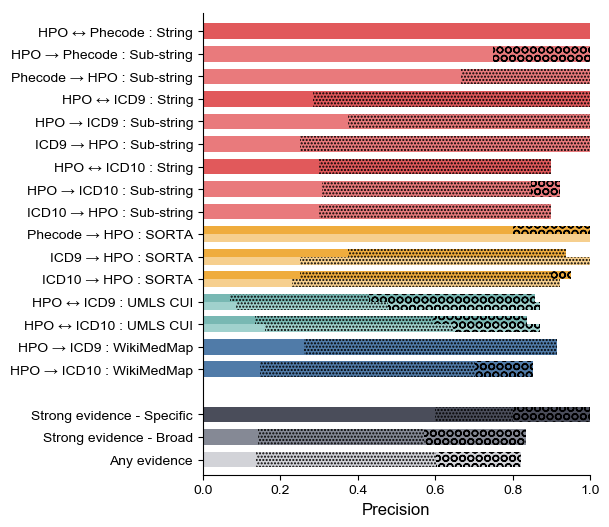

evidence
stringMatch_hpo-phecodeX          1.000000
subStringMatch_hpo-to-phecodeX    1.000000
subStringMatch_phecodeX-to-hpo    1.000000
stringMatch_hpo-ICD9              1.000000
subStringMatch_hpo-to-ICD9        1.000000
subStringMatch_ICD9-to-hpo        1.000000
stringMatch_hpo-ICD10             0.900000
subStringMatch_hpo-to-ICD10       0.923077
subStringMatch_ICD10-to-hpo       0.900000
SORTA_phecodeX-to-hpo             1.000000
SORTA_ICD9-to-hpo                 0.937500
SORTA_ICD10-to-hpo                0.950000
sharedUMLSCUIplusRel_ICD9-hpo     0.857143
sharedUMLSCUIplusRel_ICD10-hpo    0.837838
wikiMedMap_hpo-to-ICD9            0.913043
wikiMedMap_hpo-to-ICD10           0.851852
                                  0.000000
StrongEvidenceSpecific            1.000000
StrongEvidenceBroad               0.833333
AnyEvidence                       0.821918
dtype: float64

In [22]:
manualReview_phecode12 = pd.read_csv(f"../data/manualReview/hpo-phecode1.2-links_manuallyReviewed.csv",dtype=str)
manualReview_phecode12 = manualReview_phecode12[manualReview_phecode12['narrower'].notnull()]
evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
precision = plotPrecision(manualReview_phecode12, allLinks_phecode12,'phecode1.2',evidenceToPlot,size_inc=1)
precision.sum()#.sort_values(ascending=False)

manualReview_children_phecode12 = pd.read_csv(f"../data/manualReview/hpo-phecode1.2-links_withHPOchildrenExpansion_manuallyReviewed.csv",dtype=str)
manualReview_children_phecode12 = manualReview_children_phecode12[manualReview_children_phecode12['narrower'].notnull()]
evidenceToPlot = evidence_phecode12 + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
precision = plotPrecision(manualReview_children_phecode12, allLinks_children_phecode12,'phecode1.2',evidenceToPlot,size_inc=1)
precision.sum()#.sort_values(ascending=False)

manualReview_phecodeX = pd.read_csv(f"../data/manualReview/hpo-phecodeX-links_manuallyReviewed.csv",dtype=str)
manualReview_phecodeX = manualReview_phecodeX[manualReview_phecodeX['narrower'].notnull()]
evidenceToPlot = evidence_phecodeX + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
precision = plotPrecision(manualReview_phecodeX, allLinks_phecodeX,'phecodeX',evidenceToPlot,size_inc=1)
precision.sum()#.sort_values(ascending=False)

manualReview_children_phecodeX = pd.read_csv(f"../data/manualReview/hpo-phecodeX-links_withHPOchildrenExpansion_manuallyReviewed.csv",dtype=str)
manualReview_children_phecodeX = manualReview_children_phecodeX[manualReview_children_phecodeX['narrower'].notnull()]
evidenceToPlot = evidence_phecodeX + ["","StrongEvidenceSpecific","StrongEvidenceBroad", "AnyEvidence"]
precision = plotPrecision(manualReview_children_phecodeX, allLinks_phecodeX,'phecodeX',evidenceToPlot,size_inc=1)
precision.sum()#.sort_values(ascending=False)


<Container object of 2 artists>

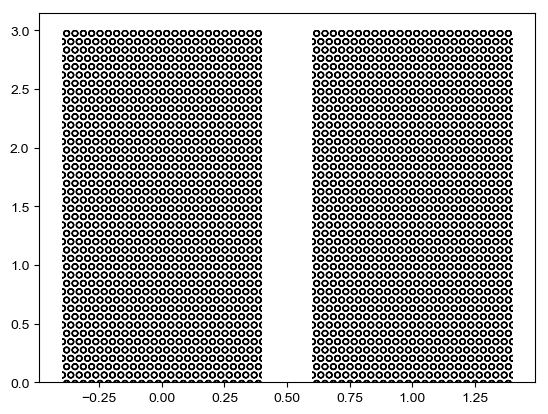

In [426]:
#plt.bar([0,1],[3,3],hatch="....",color='w')
plt.bar([0,1],[3,3],hatch='OO',color='w')

#### Examples where manual links did not support automated links

In [19]:
wrong = manualReview_phecode12.merge(allLinks_phecode12)
wrong = wrong[wrong['narrower'] == '0']
wrong.loc[190]
wrong.loc[167]

wrong
wrong[wrong['hpo_code'] == 'HP_0031180']
wrong[wrong['hpo_code'] == 'HP_0010750']
wrong[wrong['hpo_code'] == 'HP_0025085']
# C0004364    M32.13  Lung involvement in systemic lupus erythematosus   HP_0002960  Autoimmunity     ['510', '695', '695.4', '695.42']
wrong[wrong['hpo_code'] == 'HP_0002960']

narrower                                                         0
phecode1.2_label                              Diseases of the jaws
hpo_label                           Fibrous dysplasia of the bones
phecode1.2_code                                                526
hpo_code                                                HP_0010734
phecode1.2_category                                      digestive
stringMatch_hpo-phecode1.2                                     NaN
subStringMatch_hpo-to-phecode1.2                               NaN
subStringMatch_phecode1.2-to-hpo                               NaN
stringMatch_hpo-ICD9                                           NaN
subStringMatch_hpo-to-ICD9                                     NaN
subStringMatch_ICD9-to-hpo                                     NaN
stringMatch_hpo-ICD10                                          NaN
subStringMatch_hpo-to-ICD10                                    NaN
subStringMatch_ICD10-to-hpo                                   

narrower                                                            0
phecode1.2_label                    Inflammatory diseases of prostate
hpo_label                                                    Orchitis
phecode1.2_code                                                   601
hpo_code                                                   HP_0100796
phecode1.2_category                                     genitourinary
stringMatch_hpo-phecode1.2                                        NaN
subStringMatch_hpo-to-phecode1.2                                  NaN
subStringMatch_phecode1.2-to-hpo                                  NaN
stringMatch_hpo-ICD9                                              NaN
subStringMatch_hpo-to-ICD9                                        NaN
subStringMatch_ICD9-to-hpo                                        NaN
stringMatch_hpo-ICD10                                            True
subStringMatch_hpo-to-ICD10                                      True
subStringMatch_ICD10

,narrower,phecode1.2_label,hpo_label,phecode1.2_code,hpo_code,phecode1.2_category,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
5,0,"Cerebral degeneration, unspecified",Communicating hydrocephalus,331.9,HP_0001334,neurological,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
7,0,Gastritis and duodenitis,Gastric hypertrophy,535,HP_0005207,digestive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
10,0,Urinary calculus,Xanthogranulomatous pyelonephritis,594,HP_0033761,genitourinary,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True
11,0,Allergic reaction to food,Gastrointestinal eosinophilia,930,HP_0032064,injuries & poisonings,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
16,0,Abnormal involuntary movements,Muscle fibrillation,350.1,HP_0010546,neurological,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True
27,0,Diseases and other conditions of the tongue,Erythema migrans,529,HP_0031180,digestive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,True,NaN,NaN,True,True
34,0,Substance addiction and disorders,Polyneuropathy,316,HP_0001271,mental disorders,NaN,NaN,NaN,NaN,...,NaN,True,True,NaN,NaN,NaN,NaN,NaN,True,True
41,0,Congenital anomalies of skin,Cutaneous mastocytosis,691,HP_0200151,dermatologic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True
53,0,Nephritis and nephropathy without mention of g...,Abnormal tubulointerstitial morphology,580.3,HP_0001969,genitourinary,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True
55,0,Thyrotoxicosis with or without goiter,Uninodular goiter,242,HP_0011773,endocrine/metabolic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


,narrower,phecode1.2_label,hpo_label,phecode1.2_code,hpo_code,phecode1.2_category,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
27,0,Diseases and other conditions of the tongue,Erythema migrans,529,HP_0031180,digestive,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,True,NaN,NaN,True,True


,narrower,phecode1.2_label,hpo_label,phecode1.2_code,hpo_code,phecode1.2_category,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
119,0,Ptosis of eyelid,Dermatochalasis,374.3,HP_0010750,sense organs,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True


,narrower,phecode1.2_label,hpo_label,phecode1.2_code,hpo_code,phecode1.2_category,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
137,0,Intestinal infection,Bloody diarrhea,008,HP_0025085,infectious diseases,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True


,narrower,phecode1.2_label,hpo_label,phecode1.2_code,hpo_code,phecode1.2_category,stringMatch_hpo-phecode1.2,subStringMatch_hpo-to-phecode1.2,subStringMatch_phecode1.2-to-hpo,stringMatch_hpo-ICD9,...,PheMap_phecode1.2-hpo,sharedUMLSCUI_ICD9-hpo,sharedUMLSCUIplusRel_ICD9-hpo,sharedUMLSCUI_ICD10-hpo,sharedUMLSCUIplusRel_ICD10-hpo,wikiMedMap_hpo-to-ICD9,wikiMedMap_hpo-to-ICD10,StrongEvidenceSpecific,StrongEvidenceBroad,AnyEvidence
58,0,Other diseases of lung,Autoimmunity,510,HP_0002960,respiratory,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True
238,0,Nephritis and nephropathy without mention of g...,Autoimmunity,580.3,HP_0002960,genitourinary,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True


## Other Suppl Figs

In [109]:
import matplotlib.colors as mcolors

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]
def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [231]:
def makeMatrixSharedEvidenceFig(allLinks,evidence,phecode_str,plotAnnotPercent=True,size=(6.5,6.5)):
    
    colors, text = colorsAndText(phecode_str)

    sharedLinks = pd.DataFrame(index=evidence,columns=evidence,dtype=float)
    for e1 in evidence:
        total = allLinks[e1].count()
        for e2 in evidence:
            shared = sum(allLinks[e1].notnull() & allLinks[e2].notnull())
            sharedLinks.loc[e1,e2] = shared/total
            
            
    fig, ax = plt.subplots(figsize=size,ncols=2,nrows=2,gridspec_kw={'width_ratios':[1,20],'height_ratios':[20,1]})
    fig.subplots_adjust(hspace=.02, wspace=.02)
    cmap = get_continuous_cmap(['#0e121ff','#9699a5','#fcfcfd'][::-1])

    im = ax[0,1].imshow(sharedLinks, cmap=cmap,vmin=0,vmax=1)
    _ = ax[0,1].set_xticks(np.arange(len(evidence)))
    _ = ax[0,1].set_yticks(np.arange(len(evidence)))
    _ = ax[0,1].set_xticklabels([])
    _ = ax[0,1].set_yticklabels([])

    for i,e in enumerate(evidence):
        _ = ax[1,1].broken_barh([(i-.5,1)],(0,1), facecolor=colors[e],edgecolor='w',linewidth=2)
    _ = ax[1,1].set_xlim(-.5,len(evidence)-.5)
    _ = ax[1,1].set_ylim(0,1)
    ax[1,1].set_frame_on(False) 
    _ = ax[1,1].set_xticks(np.arange(len(evidence)))
    _ = ax[1,1].set_xticklabels([text[x] for x in evidence],rotation=45, ha='right', rotation_mode='anchor') # or 90
    _ = ax[1,1].set_yticks([])


    for i,e in enumerate(evidence[::-1]):
        _ = ax[0,0].broken_barh([(0,1)],(i-.5,1), facecolor=colors[e],edgecolor='w',linewidth=2)
    _ = ax[0,0].set_ylim(-.5,len(evidence)-.5)
    _ = ax[0,0].set_xlim(0,1)
    ax[0,0].set_frame_on(False) 
    _ = ax[0,0].set_yticks(np.arange(len(evidence)))
    _ = ax[0,0].set_yticklabels([text[x] for x in evidence[::-1]])
    _ = ax[0,0].set_xticks([])
    

#    ax[1,1].set_xlabel("Proportion of target HPO-Phecode links\nidentified by alternative evidence")
    ax[0,0].set_ylabel("Original evidence")

    fig.delaxes(ax[1,0])

    if plotAnnotPercent:
        for i in range(len(evidence)):
            for j in range(len(evidence)):
                if sharedLinks.iloc[i, j] < .4:
                    color = '.2'
                else:
                    color = 'w'
                _ = ax[0,1].text(j, i, f"{int(sharedLinks.iloc[i, j]*100)}%",
                               ha="center", va="center", color=color,fontsize=8)

    plt.show()

In [257]:
evidence_phecode12_customOrder = [
    'stringMatch_hpo-phecode1.2',
    'subStringMatch_hpo-to-phecode1.2',
    'subStringMatch_phecode1.2-to-hpo',
    'SORTA_phecode1.2-to-hpo',
    'PheMap_phecode1.2-hpo',
    'stringMatch_hpo-ICD9',
    'subStringMatch_hpo-to-ICD9',
    'subStringMatch_ICD9-to-hpo',
    'SORTA_ICD9-to-hpo',
    'stringMatch_hpo-ICD10',
    'subStringMatch_hpo-to-ICD10',
    'subStringMatch_ICD10-to-hpo',
    'SORTA_ICD10-to-hpo',
    'sharedUMLSCUIplusRel_ICD9-hpo',
    'sharedUMLSCUIplusRel_ICD10-hpo',
    'wikiMedMap_hpo-to-ICD9',
    'wikiMedMap_hpo-to-ICD10',
]

evidence_phecodeX_customOrder = [
    'stringMatch_hpo-phecodeX',
    'subStringMatch_hpo-to-phecodeX',
    'subStringMatch_phecodeX-to-hpo',
    'SORTA_phecodeX-to-hpo',
    'stringMatch_hpo-ICD9',
    'subStringMatch_hpo-to-ICD9',
    'subStringMatch_ICD9-to-hpo',
    'SORTA_ICD9-to-hpo',
    'stringMatch_hpo-ICD10',
    'subStringMatch_hpo-to-ICD10',
    'subStringMatch_ICD10-to-hpo',
    'SORTA_ICD10-to-hpo',
    'sharedUMLSCUIplusRel_ICD9-hpo',
    'sharedUMLSCUIplusRel_ICD10-hpo',
    'wikiMedMap_hpo-to-ICD9',
    'wikiMedMap_hpo-to-ICD10',
]

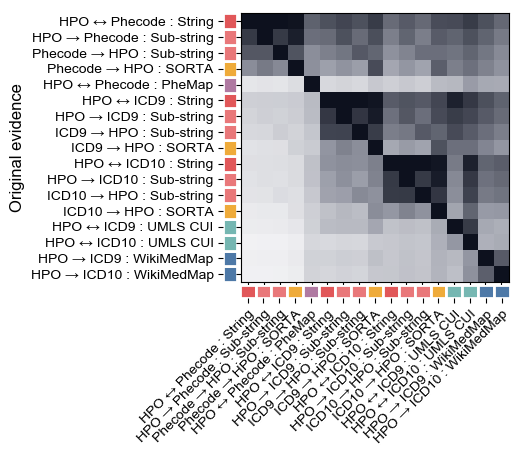

In [232]:
makeMatrixSharedEvidenceFig(allLinks_phecode12, evidence_phecode12_customOrder,'phecode1.2',plotAnnotPercent=False,size=(3.7,3.7))

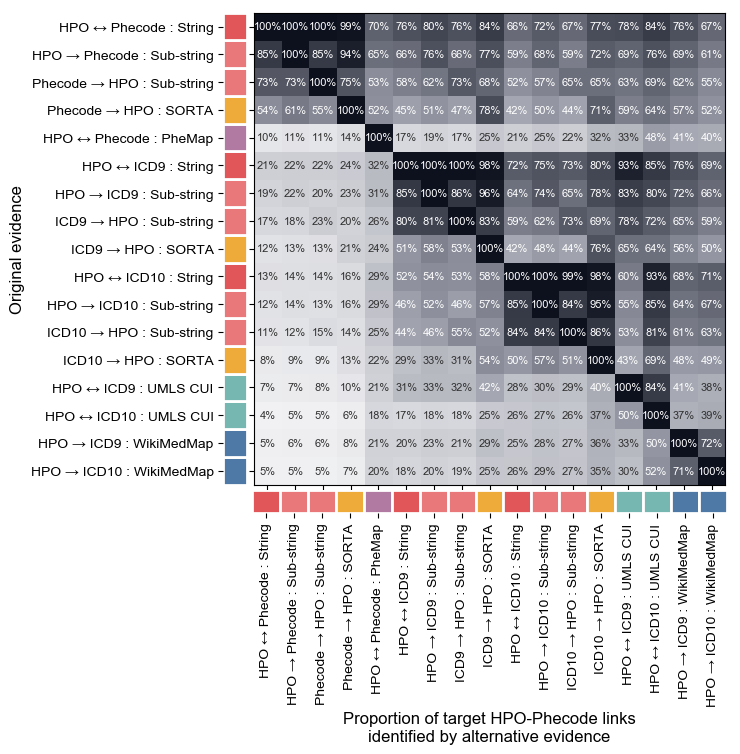

In [114]:
makeMatrixSharedEvidenceFig(allLinks_phecode12, evidence_phecode12_customOrder,'phecode1.2')

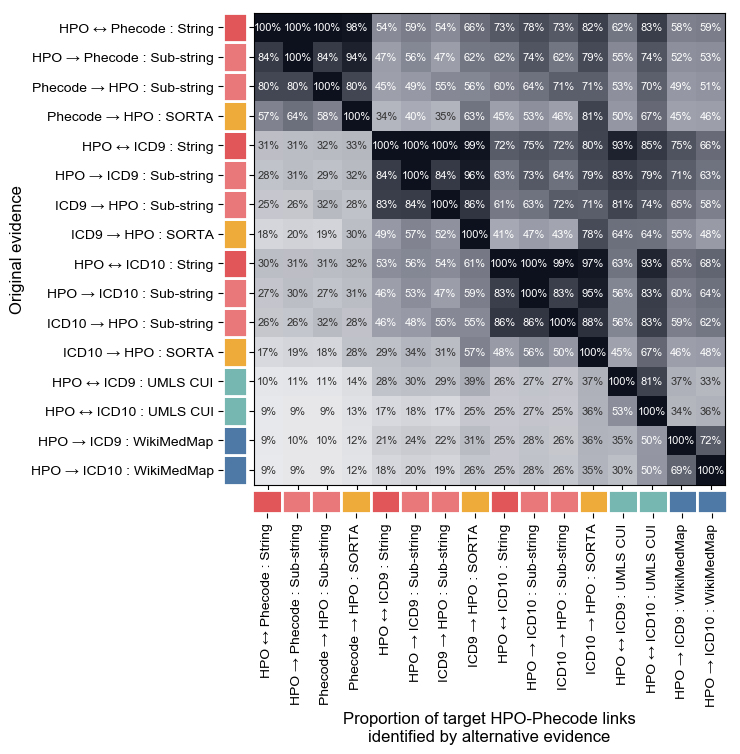

In [115]:
makeMatrixSharedEvidenceFig(allLinks_phecodeX, evidence_phecodeX_customOrder,'phecodeX')

[Text(0,1,'0'),
 Text(0,1,'0.25'),
 Text(0,1,'0.5'),
 Text(0,1,'0.75'),
 Text(0,1,'1')]

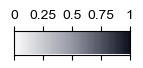

In [417]:
fig,ax=plt.subplots(figsize=(3,.3))
ax.matshow(np.array([np.linspace(0,1,100) for x in range(20)]), cmap= cmap, vmax=1, vmin=0);
ax.set_xticks([0,25,50,75,100]);
ax.set_xticklabels([0,0.25,0.5,0.75,1]);
ax.get_yaxis().set_visible(False)


In [275]:
for e in evidence_phecode12:
    print(e)
    subset = allLinks_phecode12[allLinks_phecode12[e].notnull()]
    num = sum(subset[[x for x in evidence_phecode12 if x != e]].count(axis=1) == 0)
    print(num/len(subset))

stringMatch_hpo-phecode1.2
0.0
subStringMatch_hpo-to-phecode1.2
0.0108108108108
subStringMatch_phecode1.2-to-hpo
0.0469483568075
stringMatch_hpo-ICD9
0.0
subStringMatch_hpo-to-ICD9
0.00391849529781
subStringMatch_ICD9-to-hpo
0.02658788774
stringMatch_hpo-ICD10
0.0
subStringMatch_hpo-to-ICD10
0.00503074343208
subStringMatch_ICD10-to-hpo
0.0251116071429
SORTA_phecode1.2-to-hpo
0.0313043478261
SORTA_ICD9-to-hpo
0.0642115203022
SORTA_ICD10-to-hpo
0.10935397039
PheMap_phecode1.2-hpo
0.364215686275
sharedUMLSCUIplusRel_ICD9-hpo
0.0803461063041
sharedUMLSCUIplusRel_ICD10-hpo
0.215097105167
wikiMedMap_hpo-to-ICD9
0.165387472147
wikiMedMap_hpo-to-ICD10
0.173839458414


In [270]:
len(allLinks_phecode12['PheMap_phecode1.2-hpo'].notnull())

10524

In [269]:
sum(allLinks_phecode12[allLinks_phecode12['PheMap_phecode1.2-hpo'].notnull()][[x for x in evidence_phecode12 if x != 'PheMap_phecode1.2-hpo']].count(axis=1) == 0)/len(allLinks_phecode12['PheMap_phecode1.2-hpo'].notnull())#.sum()

0.070600532117065753